# Makemore: bigrams with neural-nets

### [The spelled-out intro to language modeling: building makemore](https://www.youtube.com/watch?v=PaCmpygFfXo)
___

In [25]:
import torch
import torch.nn.functional as F
import string
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
with open('names.txt') as f:
    names = f.read().splitlines()

In [4]:
len(names)

32033

In [7]:
tokens = ['.'] + list(string.ascii_lowercase)
t_i = {t:i for i,t in enumerate(tokens)}
i_t = {i:t for t,i in t_i.items()}

In [21]:
# creating training set

inputs = []
targets = []

In [22]:
for word in names[:1]:
    word = ['.'] + list(word) + ['.']
    for ch1, ch2 in zip(word,word[1:]):
        r = t_i[ch1]
        c = t_i[ch2]
        inputs.append(r)
        targets.append(c)

In [23]:
inputs = torch.tensor(inputs)
targets = torch.tensor(targets)
inputs, targets

(tensor([ 0,  5, 13, 13,  1]), tensor([ 5, 13, 13,  1,  0]))

In [27]:
# we one-hot encode these int tensors

X_enc = F.one_hot(inputs, num_classes=len(tokens))

torch.Size([5, 27])


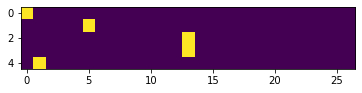

In [30]:
print(X_enc.shape)
plt.imshow(X_enc)

In [31]:
X_enc.dtype # we need float for inputs not int64

torch.int64

In [35]:
X_enc.float()

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [41]:
w = torch.randn(size=(len(tokens),1))
"""
w: 27x1
X: 5x27

X@w: 5x1
"""
X_enc.float() @ w

tensor([[ 0.5819],
        [-0.7410],
        [ 0.5692],
        [ 0.5692],
        [-0.4384]])

In [47]:
# let's use 27 neurons
# weights of each neuron are along the column
"""
w: 27x27
X: 5x27

X@w: 5x27
"""

w = torch.randn(size=(27,27))
(X_enc.float() @ w).shape

torch.Size([5, 27])

In [43]:
X_enc.float()[3]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [45]:
w[:,13]

tensor([ 0.6147, -1.2964, -0.1946,  1.0723, -0.7888,  0.3645, -0.8814,  0.8644,
        -1.0817,  0.6416,  1.1896,  0.2607,  0.7135,  0.9022, -0.8449, -0.2512,
        -0.3600, -1.3310, -0.4677,  0.9165,  1.3682, -0.9608,  0.5042,  0.5871,
         0.3524, -0.7845, -0.4747])

In [46]:
(X_enc.float()[3] * w[:,13]).sum()

tensor(0.9022)

In [51]:
# from this multiplication we need log counts
# we will exponentiate them
# then probabilities will be the normalized log counts

logits = (X_enc.float() @ w) # log counts
counts = logits.exp() # equivalent to N
probs = counts / counts.sum(1, keepdims=True)
probs

tensor([[0.0054, 0.0394, 0.0210, 0.0157, 0.0292, 0.0119, 0.0084, 0.0310, 0.0184,
         0.0206, 0.0170, 0.0106, 0.0543, 0.0146, 0.0164, 0.0267, 0.0086, 0.0037,
         0.0249, 0.0347, 0.0466, 0.1891, 0.0442, 0.0833, 0.0223, 0.0076, 0.1944],
        [0.0279, 0.0219, 0.0066, 0.0120, 0.0332, 0.0170, 0.0133, 0.0075, 0.0054,
         0.0113, 0.0139, 0.0128, 0.0121, 0.0057, 0.0979, 0.0323, 0.0427, 0.0846,
         0.0137, 0.0132, 0.0071, 0.0201, 0.0287, 0.0035, 0.3129, 0.0294, 0.1136],
        [0.0464, 0.0471, 0.0399, 0.0156, 0.0214, 0.0183, 0.0033, 0.0381, 0.1093,
         0.0440, 0.0091, 0.0648, 0.0294, 0.0182, 0.0069, 0.0021, 0.1062, 0.0162,
         0.0138, 0.0099, 0.0478, 0.0471, 0.0088, 0.0058, 0.1672, 0.0524, 0.0109],
        [0.0464, 0.0471, 0.0399, 0.0156, 0.0214, 0.0183, 0.0033, 0.0381, 0.1093,
         0.0440, 0.0091, 0.0648, 0.0294, 0.0182, 0.0069, 0.0021, 0.1062, 0.0162,
         0.0138, 0.0099, 0.0478, 0.0471, 0.0088, 0.0058, 0.1672, 0.0524, 0.0109],
        [0.0475, 0.0696,

In [52]:
probs.sum(dim=1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000])

In [54]:
targets[0], probs[0]

(tensor(5),
 tensor([0.0054, 0.0394, 0.0210, 0.0157, 0.0292, 0.0119, 0.0084, 0.0310, 0.0184,
         0.0206, 0.0170, 0.0106, 0.0543, 0.0146, 0.0164, 0.0267, 0.0086, 0.0037,
         0.0249, 0.0347, 0.0466, 0.1891, 0.0442, 0.0833, 0.0223, 0.0076, 0.1944]))

so what we need to do now is calculate weights and then backpropagate to minimize nll

In [55]:
inputs, targets

(tensor([ 0,  5, 13, 13,  1]), tensor([ 5, 13, 13,  1,  0]))

In [56]:
seed = 2147483647
gen = torch.Generator().manual_seed(seed)

In [57]:
W = torch.randn((27,27),generator=gen)

In [60]:
# forward pass

x_enc = F.one_hot(inputs, num_classes=len(tokens)).float()
logits = x_enc @ W

# these next 2 lines is basically softmax
counts = logits.exp()
probs = counts / counts.sum(1, keepdims=True)

In [61]:
probs.shape

torch.Size([5, 27])

In [65]:
nlls = torch.zeros(5)

for i in range(5):
    # i-th bigram
    x = inputs[i].item()
    y = targets[i].item()
    print('-'*25)
    print(f"bigram: {i_t[x]}{i_t[y]}\tindices: {x},{y}")
    print(f"neural network input: {x}")
    print(f"output probabilities: {probs[i]}")
    print(f"actual output [label]: {y}")
    p = probs[i,y]
    print(f"predicted label: {p.item()}")
    
    logp = torch.log(p)
    nll = -logp
    print(f"log likelihood: {logp}\tnegative log likelihood: {nll}")
    nlls[i] = nll
    print('-'*25)
    
print('==='*10)
print(f"average nll: {nlls.mean().item()}")

-------------------------
bigram: .e	indices: 0,5
neural network input: 0
output probabilities: tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])
actual output [label]: 5
predicted label: 0.01228625513613224
log likelihood: -4.399273872375488	negative log likelihood: 4.399273872375488
-------------------------
-------------------------
bigram: em	indices: 5,13
neural network input: 5
output probabilities: tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472])
actual output [label]: 13
predicted label: 0.018050700426101685
log likelihood: -4.014570713043213	negative log likelihood: 4.014570713043213
-----------------

In [68]:
# we are interested in the probability that corresponds to the target: probs[input_idx,target_idx]
# input_idx: 0,1,2,3,4
probs[torch.arange(5), targets]

tensor([0.0123, 0.0181, 0.0267, 0.0737, 0.0150])

In [69]:
-probs[torch.arange(5), targets].log().mean()

tensor(3.7693)

In [72]:
seed = 2147483647
gen = torch.Generator().manual_seed(seed)
W = torch.randn((27,27),generator=gen, requires_grad=True)
# forward pass
x_enc = F.one_hot(inputs, num_classes=len(tokens)).float()
logits = x_enc @ W

# these next 2 lines is basically softmax
counts = logits.exp()
probs = counts / counts.sum(1, keepdims=True)


# backward pass

W.grad = None # W.grad =0

loss = -probs[torch.arange(5), targets].log().mean()
loss.backward()

In [80]:
# positive grad: positive influence...adding small h to it will increase the loss
W.grad.shape

torch.Size([27, 27])

In [81]:
# optimization step
W.data += -0.1 * W.grad

we see that now the loss has gone from 3.76ish -> 3.74ish, so the model is slightly better

In [84]:
logits = x_enc @ W
counts = logits.exp()
probs = counts / counts.sum(1, keepdims=True)
loss = -probs[torch.arange(5), targets].log().mean()
loss.item()

3.7492127418518066

___

# Single Layer Neural Net

In [85]:
with open('names.txt') as f:
    names = f.read().splitlines()

In [86]:
tokens = ['.'] + list(string.ascii_lowercase)
t_i = {t:i for i,t in enumerate(tokens)}
i_t = {i:t for t,i in t_i.items()}

In [93]:
inputs = []
targets = []

In [94]:
for word in names:
    word = ['.'] + list(word) + ['.']
    for ch1, ch2 in zip(word,word[1:]):
        r = t_i[ch1]
        c = t_i[ch2]
        inputs.append(r)
        targets.append(c)

In [95]:
inputs = torch.tensor(inputs)
targets = torch.tensor(targets)

In [106]:
num = inputs.nelement()
num

228146

In [118]:
seed = 2147483647
gen = torch.Generator().manual_seed(seed)

In [98]:
X = F.one_hot(inputs, num_classes=len(tokens)).float()

In [103]:
X.shape

torch.Size([228146, 27])

In [119]:
lr = 50
epochs = 100

In [120]:
W = torch.randn((27,27),generator=gen, requires_grad=True)


for epoch in range(1,epochs+1):
    
    # forward pass:
    
    logits = X @ W
    counts = logits.exp()
    probs = counts/counts.sum(1,keepdims=True)
    
    loss = -probs[torch.arange(num), targets].log().mean()
    
    if epoch % 10 == 0:
        print(f"loss at epoch {epoch}:\t{loss.item()}")
    
    # backward pass:
    W.grad = None
    loss.backward()
    
    # optimization:
    W.data += -lr * W.grad

loss at epoch 10:	2.711496353149414
loss at epoch 20:	2.579403877258301
loss at epoch 30:	2.533154249191284
loss at epoch 40:	2.510324001312256
loss at epoch 50:	2.497144937515259
loss at epoch 60:	2.488725185394287
loss at epoch 70:	2.4829084873199463
loss at epoch 80:	2.4786534309387207
loss at epoch 90:	2.4754140377044678
loss at epoch 100:	2.4728763103485107


the above W, its W.exp() is equivalent to the N table we obtained via counting.

we added fake counts to N, the more we add, the more the probabilities are uniform and smooth.

in gradient-descent based learning,

we can add regularization which is basically adding a large constant to the loss for more uniform loss
___

Training loop with regularization:

In [126]:
W = torch.randn((27,27),generator=gen, requires_grad=True)
lr = 50
epochs = 150

for epoch in range(1,epochs+1):
    
    # forward pass:
    logits = X @ W
    counts = logits.exp()
    probs = counts/counts.sum(1,keepdims=True)
    
    # regularization
    regularization_const = torch.pow(W,2).mean()
    lmb = 0.01 # more the lambda, more the const, more the impact on loss, more uniform the weights
    
    # loss with regularization
    loss = -probs[torch.arange(num), targets].log().mean()
    loss += lmb * regularization_const
    
    if epoch % 10 == 0:
        print(f"loss at epoch {epoch}:\t{loss.item()}")
    
    # backward pass:
    W.grad = None
    loss.backward()
    
    # optimization:
    W.data += -lr * W.grad

loss at epoch 10:	2.695918560028076
loss at epoch 20:	2.5837419033050537
loss at epoch 30:	2.5430855751037598
loss at epoch 40:	2.5226268768310547
loss at epoch 50:	2.510843276977539
loss at epoch 60:	2.5034449100494385
loss at epoch 70:	2.4984467029571533
loss at epoch 80:	2.4948818683624268
loss at epoch 90:	2.4922428131103516
loss at epoch 100:	2.4902377128601074
loss at epoch 110:	2.4886841773986816
loss at epoch 120:	2.487460136413574
loss at epoch 130:	2.486481189727783
loss at epoch 140:	2.4856879711151123
loss at epoch 150:	2.4850363731384277


___

SAMPLING

In [127]:
seed = 2147483647
gen = torch.Generator().manual_seed(seed)

for i in range(25):
    
    name = ''
    idx = 0
    while True:
        x = F.one_hot(torch.tensor([idx]), num_classes=len(tokens)).float()
        logits = x @ W
        counts = logits.exp()
        p = counts/counts.sum(1, keepdims=True)
        
        idx = torch.multinomial(p,num_samples=1,replacement=True,generator=gen).item()
        name += i_t[idx]
        if idx == 0:
            break
    print(name)

mor.
axx.
minaymoryles.
kondmaisah.
anchthizarie.
odaren.
iaddash.
h.
jionatien.
egwulo.
ga.
t.
a.
jayn.
ilemannariaenien.
ad.
f.
akiinela.
trttanakeroruceyaaxbrima.
lamoyonutonadengin.
torrederahnn.
ellovyllpasskh.
a.
wai.
kole.
